# Introduction to pandas

1. Creating a DataFrame
2. Select columns & rows from a DataFrame
3. Calculate aggregations/descriptive statistics
4. Grouped calculations

## The Basics

In [1]:
import pandas as pd

### Create a pandas DataFrame

In [2]:
d = {'a': 1, 'b': 2, 'c': 3}
d['b']

2

In [3]:
df = pd.DataFrame({
    'eye':    ['brown', 'green', 'blue', 'blue', 'brown', 'brown'],
    'hair':   ['brown', 'blonde', 'red', 'blonde', 'brown', 'blue'],
    'height': [60,       72,      62,     65,      80,      74    ],
})

# print(df) # Jupyter will display the last line of your cell!
df

,eye,hair,height
0,brown,brown,60
1,green,blonde,72
2,blue,red,62
3,blue,blonde,65
4,brown,brown,80
5,brown,blue,74


### Selecting Columns & Rows

In [4]:
df.dtypes

eye       object
hair      object
height     int64
dtype: object

In [5]:
# df['height'] # select single column
df[['height', 'eye']] # select multiple columns

,height,eye
0,60,brown
1,72,green
2,62,blue
3,65,blue
4,80,brown
5,74,brown


#### Comparators
- Less than `<`
- Greater than `>`
- Less than/equal to `<=`
- Greater than/equal to `>=`
- Is equal to `==`
- Not equal to `!=`

In [6]:
# df['eye'] == 'brown'
# df['height'] == 60
# df['height'] <= 70

# df.loc[df['height'] <= 70] # filtering on a boolean criteria
df.loc[df['eye'] == 'brown'] # individuals with brown eyes

,eye,hair,height
0,brown,brown,60
4,brown,brown,80
5,brown,blue,74


In [7]:
df

,eye,hair,height
0,brown,brown,60
1,green,blonde,72
2,blue,red,62
3,blue,blonde,65
4,brown,brown,80
5,brown,blue,74


In [8]:
(df['eye'] == 'brown') & (df['height'] <= 70) # combine boolean expressions
# df.loc[(df['eye'] == 'brown') & (df['height'] <= 70)]

(df['eye'] == 'brown') | (df['height'] <= 70) # combine boolean expressions
# df.loc[(df['eye'] == 'brown') | (df['height'] <= 70)]

df.loc[(df['eye'] != 'brown')]

,eye,hair,height
1,green,blonde,72
2,blue,red,62
3,blue,blonde,65


### Calculations
- algebraic operations
    - addition, subtraction, multiplication, division, power
- aggregations
    - min, max
    - mean, median, mode
    - standard deviation

In [9]:
df.dtypes

eye       object
hair      object
height     int64
dtype: object

In [10]:
# df.select_dtypes('object')
# ((df['height'] + 10).astype(str)) + ' inches'
# df['height'] + 100.1

# df['height'] - 100
# df['height'] / 10
# df['height'] * 100
# df['height'] ** 2

# df['height'].max()
# df['height'].min()
# df['height'].mean()
# df['height'].median()
# df['height'].quantile([.25, .5, .75])
df['height'].std()

7.756717518813398

In [11]:
df.groupby('eye')['height'].mean()

eye
blue     63.500000
brown    71.333333
green    72.000000
Name: height, dtype: float64

## Applied to Fred
### Load Data from Fred

In [12]:
from fredapi import Fred
fred = Fred(api_key='8f59dec25e3eb3275581b6d50ddbc63b')

# OECD Total share price index 
oecd_series = (
    fred.get_series(
        'SPASTT01USM661N', observation_start='1960-01-01', observation_end='2023-07-01'
    )
)

cpi_series =(
    fred.get_series('CPIAUCSL', observation_start='1960-01-01', observation_end='2023-07-01')
)

fred_df = pd.DataFrame({
    'OECD': oecd_series,
    'CPI': cpi_series
})

fred_df.head(5)
# data.head() # view first N rows/entries
# data.tail() # view last N rows/entries

,OECD,CPI
1960-01-01,3.418156,29.37
1960-02-01,3.255919,29.41
1960-03-01,3.205570,29.41
1960-04-01,3.233542,29.54
1960-05-01,3.205570,29.57


In [13]:
# fred_df['CPI_adj'] = 1 # Make a new column in pandas
fred_df['CPI_adj'] = fred_df['CPI'] / fred_df.loc['2023-01-01']['CPI']
fred_df

,OECD,CPI,CPI_adj
1960-01-01,3.418156,29.370,0.097784
1960-02-01,3.255919,29.410,0.097917
1960-03-01,3.205570,29.410,0.097917
1960-04-01,3.233542,29.540,0.098350
1960-05-01,3.205570,29.570,0.098450
...,...,...,...
2023-03-01,141.134600,301.744,1.004621
2023-04-01,145.176100,303.032,1.008909
2023-05-01,142.470800,303.365,1.010018
2023-06-01,145.834400,304.003,1.012142


## Load Data from a File (.csv)
- [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [`pandas.read_excel`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [14]:
!pwd

/Users/lutaiming/Library/Mobile Documents/com~apple~CloudDocs/US/JHU/Economics/Tools for Writing an Economics Paper/AS.180.369/contrib/camriddell


In [15]:
df_gop = pd.read_csv(
    "../../materials/presidential-term-data/GOP_flag.csv",
    dtype={'Date': str, 'GOP': bool}
)

df_gop = df_gop.drop_duplicates() # remove duplicate rows from data

# Seeing party is easier to understand than boolean of GOP
df_gop['party'] = df_gop['GOP'].map({True: 'GOP', False: 'Dem'})

# Dates are currently strings and we need them to be datetimes
# we are updating the date column with the converted version of itself
# Note that .str.ljust is a quick fix for improper dates
df_gop['Date'] = pd.to_datetime(
    df_gop['Date'].str.ljust(7, '0'), format='%Y.%m'
)

df_gop.head()

,Date,GOP,party
0,1871-01-01,True,GOP
1,1871-02-01,True,GOP
2,1871-03-01,True,GOP
3,1871-04-01,True,GOP
4,1871-05-01,True,GOP


## Simple Econometrics

First we need to combine ALL of our data. We covered constructing a NEW DataFrame given some parts, but we can also combine 2 DataFrames along a specified column via [`.merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html). If you have used Excel, this is essentially a VLOOKUP:


In [16]:
from numpy import log

final_df = fred_df.merge(df_gop, left_index=True, right_on='Date')
final_df = final_df.loc[final_df['Date'] >= '1970'] # let's only consider dates later than 2007

final_df['real_total_return'] = final_df['OECD'] * final_df['CPI_adj']
final_df['log_real_total_return'] = log(final_df['real_total_return'])
final_df['party_lag'] = final_df['party'].shift()

final_df.head()

,OECD,CPI,CPI_adj,Date,GOP,party,real_total_return,log_real_total_return,party_lag
1188,5.003093,37.9,0.126184,1970-01-01,True,GOP,0.631308,-0.459961,None
1189,4.828743,38.1,0.126849,1970-02-01,True,GOP,0.612523,-0.490168,GOP
1190,4.897915,38.3,0.127515,1970-03-01,True,GOP,0.624559,-0.470709,GOP
1191,4.705036,38.5,0.128181,1970-04-01,True,GOP,0.603097,-0.505677,GOP
1192,4.124212,38.6,0.128514,1970-05-01,True,GOP,0.530020,-0.634841,GOP


In [17]:
# Ordinary Least Squares Regression
## Statsmodels has 2 ways of conducting regressions
### - from a formula
### - from design matrices
## We'll focus on computing a regression from a formula
from statsmodels.formula.api import ols

# model formulation https://www.statsmodels.org/stable/examples/notebooks/generated/formulas.html
#            dependent   ~ independent
#            endogenous  ~ exodenous
#                      y ~ x
model = ols('log_real_total_return ~ party_lag', data=final_df) # create linear model
fit = model.fit()                                  # run/fit the model

# Note that Y is contiuous/numeric (CPI_adj_log)
#      and X is categorical (party)

fit.summary() # print out a summary of the regression; 
             # note that this did not perform well

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_real_total_return   R-squared:                       0.090
Model:                               OLS   Adj. R-squared:                  0.088
Method:                    Least Squares   F-statistic:                     63.22
Date:                   Mon, 14 Oct 2024   Prob (F-statistic):           8.37e-15
Time:                           16:51:20   Log-Likelihood:                -1225.4
No. Observations:                    642   AIC:                             2455.
Df Residuals:                        640   BIC:                             2464.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.1601      0.100     31.711      0.000       2.964       3.356
party_lag[T.GOP]    -1.0395      0.131     -7.951      0.000      -1.296      -0.783
==============================================================================
Omnibus:                      139.120   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.642
Skew:                          -0.324   Prob(JB):                     6.70e-09
Kurtosis:                       2.006   Cond. No.                         2.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.0, 1.0, 'Statistically Significant Effect of Party on Real Total Returns')

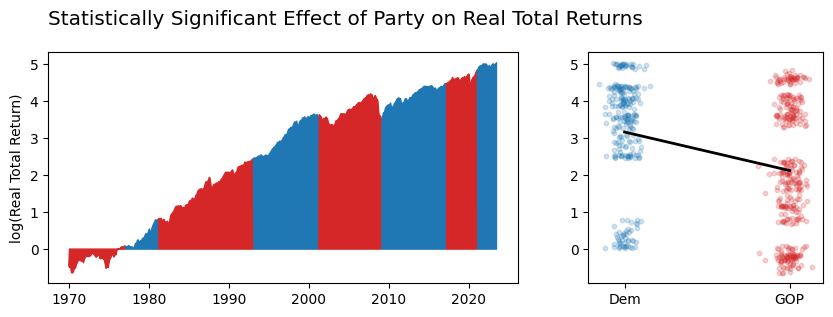

In [18]:
from numpy import array
from numpy.random import default_rng
from matplotlib.pyplot import subplots

fig, (ax1, ax2) = subplots(
    1, 2, figsize=(10, 3), gridspec_kw={'width_ratios': [2, 1]}, sharey=True
)
order = {'Dem': 0, 'GOP': 1}
colors = {'Dem': 'tab:blue', 'GOP': 'tab:red'}

## First plot → focus on the context of the question at hand
ax1.fill_between(
    final_df['Date'], final_df['log_real_total_return'], where=final_df['party_lag'] == 'GOP',
    color=colors['GOP'], interpolate='pre',
)
ax1.fill_between(
    final_df['Date'], final_df['log_real_total_return'], where=final_df['party_lag'] == 'Dem',
    color=colors['Dem'], interpolate='pre',
)

ax1.set_ylabel('log(Real Total Return)')

## Second plot → focus on the categorical linear regression
rng = default_rng(0)
for party, group in final_df.groupby('party_lag'):
    ax2.scatter(
        order[party] + rng.normal(scale=.05, size=len(group)), 
        group['log_real_total_return'],
        s=10, alpha=.2,
        color=colors[party]
    )
ax2.set_xticks([*order.values()], labels=order.keys())

x = array([0, 1])
y = (x * fit.params.loc["party_lag[T.GOP]"]) + fit.params.loc['Intercept']
ax2.plot(x, y, color='k', lw=2)
ax2.yaxis.set_tick_params(left=True, labelleft=True)
ax1.set_title(
    'Statistically Significant Effect of Party on Real Total Returns', 
    size='x-large', loc='left',
    pad=20
)